# 오늘의 목표

수업 후 학생은 아래를 할 수 있어야 합니다.

1. “지금 질문이 추이/비교/관계/분포/이상치 중 무엇인지” 구분

2. 그에 맞는 차트 Line / Bar / Scatter / Histogram / Box 선택

3. 차트를 그리기 전에 필요한 전처리(특히 집계+정렬, 결측 제거, 이상치 감 잡기) 수행

4. 그래프를 보고 2문장 해석(관찰 1 + 가설/다음 질문 1) 작성

## 0. 시각화는 “그리기”가 아니라 “질문에 답하기”다

초보자가 흔히 하는 실수는:

- “예쁜 그래프”를 목표로 함

- 데이터를 그대로 넣고 그림(= 의미 없는 그림)

시각화는 결국 이것입니다:

- 질문(Problem): 무엇이 궁금한가?

- 데이터(Proof): 어떤 근거로 말할 건가?

- 차트(Communication): 근거를 가장 빠르게 이해시키는 그림은 무엇인가?

## 1. 차트 선택의 5가지 기준(상황 분류표)

아래 중 무엇인지 먼저 고르면, 차트가 자동으로 결정됩니다.

1. 시간에 따른 변화(추이) → Line

2. 항목 간 크기 비교(순위) → Bar

3. 두 변수 관계(상관/패턴) → Scatter

4. 값이 어떻게 퍼져 있나(분포) → Histogram

5. 이상치/범위/안정성 비교(사분위, IQR = Interquartile Range) → Box(또는 Violin)

## 2. Matplotlib vs Seaborn (초보자 관점 요약)


Matplotlib: 기본 엔진(모든 세부 조정 가능), 다만 코드가 조금 길어질 수 있음

Seaborn: “기본적으로 보기 좋게” + 통계형 시각화(분포/관계)에 강함

추천 학습 루트:

- Seaborn으로 빨리 성공 → “왜 이 차트가 맞는지” 이해 → 필요할 때 Matplotlib로 디테일 조정

## 3. 실습 데이터(전처리 복습 포함)

전처리 수업을 막 끝낸 상태라면, 시각화 전에 아래처럼 “최소 전처리”가 필요합니다.

In [15]:
import pandas as pd
import numpy as np

In [16]:
raw = [
    {"date":"2026-01-01","store":"A","menu":"Americano","price":"4500원","qty":"2","paid":"TRUE"},
    {"date":"2026/01/01","store":"A","menu":"Latte","price":"5,000","qty":1,"paid":"True"},
    {"date":"2026-01-02","store":"A","menu":"Latte","price":None,"qty":2,"paid":"FALSE"},
    {"date":"2026-01-03","store":"B","menu":"Mocha","price":"5500","qty":None,"paid":True},
    {"date":"2026-01-03","store":"B","menu":"Americano","price":"4500","qty":1,"paid":"TRUE"},
    {"date":"2026-01-04","store":"B","menu":"Latte","price":"5000원","qty":"3","paid":"TRUE"},
]
df = pd.DataFrame(raw)

# 1) 날짜
df["date"] = pd.to_datetime(df["date"], errors="coerce", format="mixed")

# 2) price 문자열→숫자
df["price"] = (df["price"].astype("string")
               .str.replace(",", "", regex=False)
               .str.replace("원", "", regex=False))
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# 3) qty 숫자화
df["qty"] = pd.to_numeric(df["qty"], errors="coerce")

# 4) paid bool 통일
df["paid"] = (df["paid"].astype("string").str.upper() == "TRUE")

# 5) 매출(sales)
df["sales"] = df["price"] * df["qty"]

df

,date,store,menu,price,qty,paid,sales
0,2026-01-01,A,Americano,4500,2.0,True,9000.0
1,2026-01-01,A,Latte,5000,1.0,True,5000.0
2,2026-01-02,A,Latte,<NA>,2.0,False,<NA>
3,2026-01-03,B,Mocha,5500,NaN,True,<NA>
4,2026-01-03,B,Americano,4500,1.0,True,4500.0
5,2026-01-04,B,Latte,5000,3.0,True,15000.0


### 핵심 파트 A) Line / Bar로 “집계 + 정렬” 익히기

A-1. Line Plot (선형 그래프) 상세 설명

언제 쓰나?

- 시간 흐름에 따른 변화를 보고 싶을 때

- “추세(trend)”를 보여주는 데 최적

주의점(초보자 실수 TOP3)

1. 날짜가 문자열이면 축이 깨짐 → to_datetime() 필수

2. 원본 데이터 그대로 그리면 “한 날짜가 여러 줄”로 섞임 → 일자별 집계(groupby) 필요

3. 날짜 정렬을 안 하면 선이 왔다 갔다 → sort_values("date") 필수

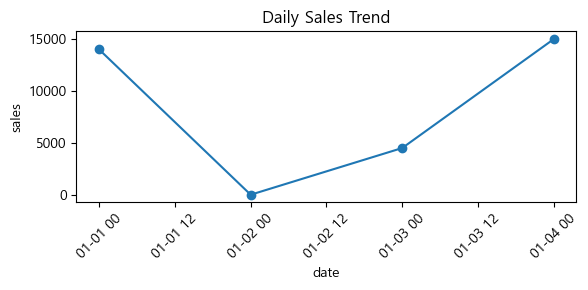

In [17]:
# 실습 코드(집계 + 정렬)
import matplotlib.pyplot as plt

daily = (df.groupby("date", as_index=False)["sales"]
         .sum()
         .sort_values("date"))

plt.figure(figsize=(6,3))
plt.plot(daily["date"], daily["sales"], marker="o")
plt.title("Daily Sales Trend")
plt.xlabel("date")
plt.ylabel("sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
## 해석 템플릿(학생 답안용)

# - 관찰: “날짜가 뒤로 갈수록 매출이 (증가/감소/변동)한다.”

# - 다음 질문: “그 변화는 (qty/price/paid) 중 무엇 때문인지 분해해서 확인하겠다.”


### A-2. Bar Chart (막대 그래프) 상세 설명

언제 쓰나?

- 항목 간 비교(메뉴별/지점별/카테고리별)

- 순위 보여주기(Top-N)

왜 “집계 + 정렬”이 핵심인가?

막대그래프는 “항목별 총합/평균”을 비교하는 경우가 대부분이라,

- groupby로 먼저 요약(집계) 하고

- sort_values로 순위를 정렬해야 “의미 있는” 그래프가 됩니다.

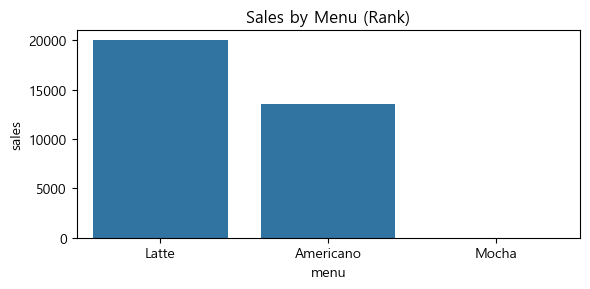

In [18]:
# 실습 코드(집계 + 정렬)

import seaborn as sns
import matplotlib.pyplot as plt

menu_sales = (df.groupby("menu", as_index=False)["sales"]
              .sum()
              .sort_values("sales", ascending=False))

plt.figure(figsize=(6,3))
sns.barplot(data=menu_sales, x="menu", y="sales")
plt.title("Sales by Menu (Rank)")
plt.tight_layout()
plt.show()

해석 템플릿

- 관찰: “매출 1등 메뉴는 Latte이며, Mocha가 가장 낮다.”

- 다음 질문: “매출이 높은 이유가 ‘가격’인지 ‘판매량(qty)’인지 확인하겠다.”

### 핵심 파트 B) Scatter로 “관계 + 결측 제거” 익히기

B-1. Scatter Plot (산점도) 상세 설명

언제 쓰나? -> 상관관계!!

- “A가 커지면 B도 커지나?”

- 즉 두 변수의 관계/패턴(양/음/무관)을 볼 때

산점도에서 결측 제거가 중요한 이유

산점도는 x, y가 둘 다 필요합니다.

price 또는 qty가 결측이면 점을 찍을 수 없어 결과가 왜곡되거나 에러가 납니다.

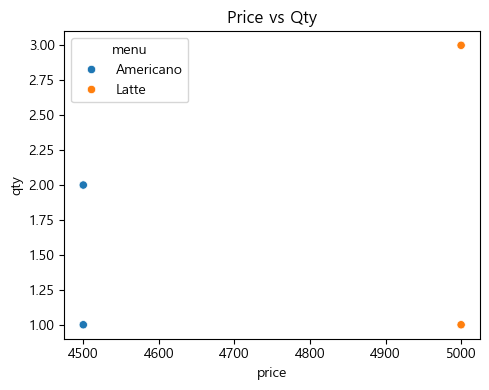

In [19]:
## 실습 코드(관계 + 결측 제거)

import seaborn as sns
import matplotlib.pyplot as plt

tmp = df.dropna(subset=["price", "qty"])  # 핵심!

plt.figure(figsize=(5,4))
sns.scatterplot(data=tmp, x="price", y="qty", hue="menu")
plt.title("Price vs Qty")
plt.tight_layout()
plt.show()
## 해석 템플릿

# - 관찰: “가격이 높을수록 수량이 (줄어드는/늘어나는/뚜렷하지 않은) 경향이 보인다.”

# - 주의: “표본이 적으므로 결론이 아니라 가설이며, 데이터가 더 필요하다.”

### 핵심 파트 C) Histogram / Box로 “분포 + 이상치” 감 잡기

C-1. Histogram (히스토그램) 상세 설명

언제 쓰나?

- 값이 어떤 구간에 몰려 있는지(분포)

- “대부분이 비슷한가?”, “극단적으로 큰 값이 있나?” 확인

히스토그램의 핵심 포인트

- bins(막대 개수)에 따라 느낌이 달라짐

- 처음엔 5~15 사이로 시작하면 초보자에게 이해가 쉬움

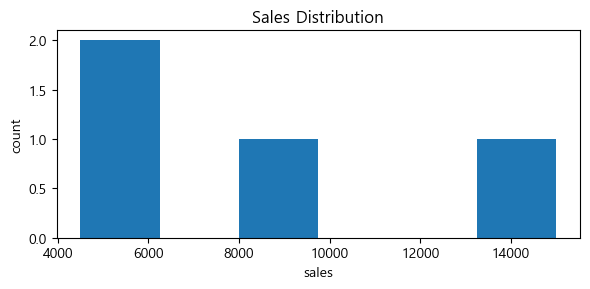

In [20]:
## 실습 코드(분포)

import matplotlib.pyplot as plt

tmp = df.dropna(subset=["sales"])

plt.figure(figsize=(6,3))
plt.hist(tmp["sales"], bins=6)
plt.title("Sales Distribution")
plt.xlabel("sales")
plt.ylabel("count")
plt.tight_layout()
plt.show()
## 해석 템플릿

# - 관찰: “매출은 주로 ___ 구간에 몰려 있다.”

# - 다음 질문: “매출이 큰 일부 데이터가 평균을 끌어올리는지(왜도) 확인하겠다.”

C-2. Box Plot (박스플롯) 상세 설명

언제 쓰나?

- **이상치(outlier)**가 있는지

- 그룹별(지점/메뉴 등)로 “어느 쪽이 더 안정적인지” 비교할 때

박스플롯이 보여주는 것(초보자용)

- 가운데 선: 중앙값

- 박스: 가운데 50%(Q1~Q3)

- 수염: 일반 범위

- 점(또는 튀는 값): 이상치 후보

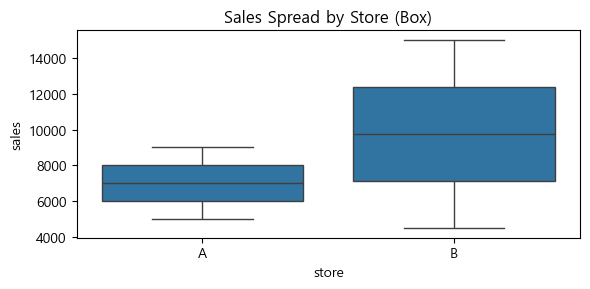

In [21]:
## 실습 코드(이상치/범위 비교)

import seaborn as sns
import matplotlib.pyplot as plt

tmp = df.dropna(subset=["sales"])

plt.figure(figsize=(6,3))
sns.boxplot(data=tmp, x="store", y="sales")
plt.title("Sales Spread by Store (Box)")
plt.tight_layout()
plt.show()
## 해석 템플릿

# - 관찰: “A 지점은 중앙값이 ___이고, 변동폭(IQR)이 (크다/작다).”

# - 다음 질문: “이상치로 보이는 값은 어떤 주문(메뉴/수량)인지 원인을 확인하겠다.”

Boxplot 구성 요소


- Q1 (1사분위수, 25th percentile)

    - 데이터의 아래쪽 25% 지점(이 값보다 작은 데이터가 약 25%)

- Q3 (3사분위수, 75th percentile)

     - 데이터의 아래쪽 75% 지점(이 값보다 작은 데이터가 약 75%)

- Box(상자)

- Q1부터 Q3까지 구간을 박스로 표시한 것

        - → 데이터의 가운데 50%가 모여 있는 범위

- Median(중앙값)

     - 박스 안의 선(보통 빨간 선)

        - → 데이터를 정렬했을 때 정확히 가운데 값(50%)

- IQR (Interquartile Range, 사분위 범위)

    - IQR = Q3 − Q1

         - → 가운데 50% 데이터가 퍼진 폭(흩어짐 정도)

- Whiskers(수염)

    - 박스에서 좌우(또는 위아래)로 뻗은 선

        - → “이상치를 제외한” 데이터 범위를 보여줍니다.

- Minimum / Maximum (그림에서 따옴표로 표시된 최소/최대)

    - 여기서 말하는 최소/최대는 진짜 최소/최대가 아니라, 보통 아래 기준으로 잡습니다.

        - 아래쪽 경계(하한): Q1 − 1.5×IQR

        - 위쪽 경계(상한): Q3 + 1.5×IQR

            - 수염은 보통 이 경계 안에 있는 데이터 중 가장 끝값까지 뻗습니다.

- Outliers(이상치)

     - 수염 밖에 점으로 찍힌 값들

        - → Q1 − 1.5×IQR보다 작거나, Q3 + 1.5×IQR보다 큰 값(“튀는 값”)

### 히트맵이란?

히트맵은 표(행×열)에 있는 숫자들을 “색”으로 바꿔서 보여주는 그래프입니다.

숫자를 일일이 읽지 않아도, 큰 값/작은 값/패턴이 한눈에 보입니다.

### 히트맵을 사용하는 이유(왜 필요할까?)

1. 패턴을 빠르게 찾기 위해

- 예: “요일×시간대 매출이 언제 가장 높은가?” 같은 질문에 매우 빠르게 답할 수 있어요.

2. 비교 대상이 많을 때 표보다 훨씬 직관적

- 카테고리가 10개, 20개 넘어가면 표는 눈이 아픈데

- 히트맵은 **색으로 ‘핫존’(높은 구간)**이 바로 보입니다.

3. 관계(상관관계)를 한 번에 보기 위해

- 여러 컬럼이 많을 때 “어떤 것끼리 같이 움직이는지”를 상관계수 히트맵으로 확인합니다.

### 초보자가 가장 많이 쓰는 히트맵 2종

1) “상관관계 히트맵” (변수들끼리 관계 보기)

언제 쓰나?

- 숫자 컬럼이 여러 개 있을 때

- “어떤 컬럼들이 서로 비슷하게 움직이지?”(상관) 확인할 때

코드(가장 기본)

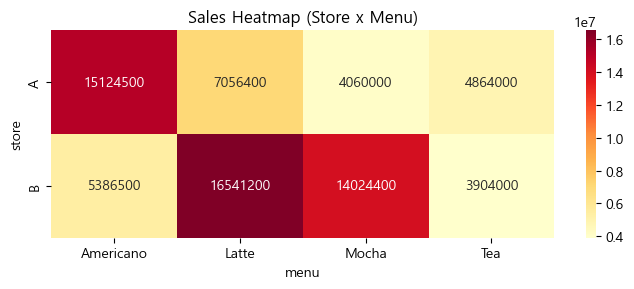

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# =========================
# 1) 샘플 데이터(df) 만들기
# =========================
stores = ["A", "B"]
menus = ["Americano", "Latte", "Mocha", "Tea"]

# 메뉴별 가격(고정)
price_map = {"Americano": 4500, "Latte": 5200, "Mocha": 5800, "Tea": 4000}

# 매장-메뉴 "기본 인기(강약)"를 크게 벌려서 히트맵 효과 극대화
# A: Americano 강 / B: Latte, Mocha 강
base_popularity = {
    "A": {"Americano": 14, "Latte": 6, "Mocha": 3, "Tea": 5},
    "B": {"Americano": 5,  "Latte": 13, "Mocha": 10, "Tea": 4},
}

# 시간대 효과(아침/점심/저녁 핫존)
def time_factor(hour: int) -> float:
    if 8 <= hour <= 10:   # 출근 커피
        return 1.6
    if 11 <= hour <= 13:  # 점심
        return 1.2
    if 18 <= hour <= 20:  # 퇴근
        return 1.4
    return 0.7            # 그 외 시간은 낮게

# 요일 효과(주말 매출 상승)
def weekend_factor(dow: int) -> float:
    # 월=0 ... 일=6
    return 1.4 if dow >= 5 else 1.0

dates = pd.date_range("2026-01-01", periods=14, freq="D")  # 2주치
hours = list(range(8, 21))  # 08~20시

rows = []
for d in dates:
    dow = d.dayofweek
    for h in hours:
        for s in stores:
            for m in menus:
                base = base_popularity[s][m]
                intensity = base * time_factor(h) * weekend_factor(dow)

                # 수량(qty): 인기 + 시간대/요일 효과 + 약간의 랜덤
                qty = np.random.poisson(lam=max(intensity, 0.1))
                qty = max(qty, 0)

                price = price_map[m]
                sales = qty * price

                rows.append({
                    "date": d,
                    "dow": dow,          # 요일 숫자(0~6)
                    "hour": h,
                    "store": s,
                    "menu": m,
                    "price": price,
                    "qty": qty,
                    "sales": sales
                })

df = pd.DataFrame(rows)

# 요일 이름(보기 좋게)
dow_name = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
df["dow_name"] = df["dow"].map(dow_name)

df.head()
pivot_store_menu = df.pivot_table(
    index="store", columns="menu", values="sales", aggfunc="sum", fill_value=0
)

plt.figure(figsize=(7,3))
sns.heatmap(pivot_store_menu, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Sales Heatmap (Store x Menu)")
plt.tight_layout()
plt.show()

해석 방법

- 값 범위: -1 ~ 1

- 1에 가까움: 같이 증가/감소(양의 상관)

- -1에 가까움: 하나가 증가하면 다른 하나는 감소(음의 상관)

- 0 근처: 뚜렷한 선형 관계가 약함

- 색이 진한 부분 = 관계가 강한 부분

2) “피벗(집계) 히트맵” (요일×시간, 매장×메뉴 같은 2차원 요약)

언제 쓰나?

- “A(행) × B(열)” 조합별로 값(매출/건수/평균)을 보고 싶을 때

예시: store(행) × menu(열) 매출 합계 히트맵

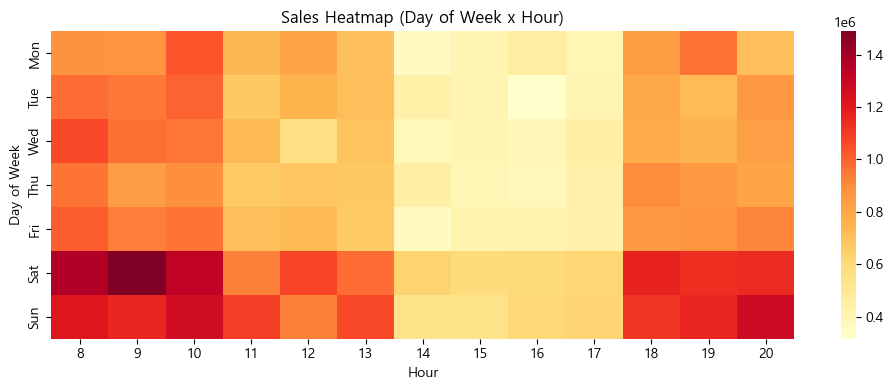

In [23]:
pivot_dow_hour = df.pivot_table(
    index="dow_name", columns="hour", values="sales", aggfunc="sum", fill_value=0
)

# 요일 순서 정렬(Mon~Sun)
pivot_dow_hour = pivot_dow_hour.reindex(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])

plt.figure(figsize=(10,4))
sns.heatmap(pivot_dow_hour, cmap="YlOrRd")
plt.title("Sales Heatmap (Day of Week x Hour)")
plt.xlabel("Hour")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

해석 방법

- 진한 색: 값이 큰 조합(예: 특정 매장에서 특정 메뉴가 강함)

- 연한 색: 값이 작은 조합

- “어디가 강점/약점인지”가 바로 보입니다.

### 히트맵 해석을 잘하는 3단계(초보자용)

1. **가장 진한 곳(최대)**부터 찾기

2. 가장 연한 곳(최소) 찾기

3. “왜 그런지” 가설 세우기

- 예: “B매장은 Latte가 진하다 → 라떼 프로모션/상권/고객층 영향일 수 있음”

### 초보자 실수 TOP3

1. 숫자가 아닌데 억지로 히트맵 → 먼저 **집계(pivot_table)**로 숫자 만들기

2. 범주가 너무 많아서 글씨가 깨짐 → Top-N만 남기거나 figsize 키우기

3. 색만 보고 결론 → 반드시 **값(annot=True)**도 함께 확인하기

### 미니 정리: 오늘 필수 기술 3줄

- Line/Bar: groupby로 집계하고, sort_values로 정렬하라

- Scatter: 관계를 보려면 x,y 결측을 dropna하라

- Hist/Box: 분포/이상치를 보며 평균만 믿지 말고 중앙값/범위도 확인하라

### (수업용) 빠른 체크 퀴즈 6문항

1. “날짜별 매출 추이”는 어떤 차트? 왜?

2. “메뉴별 매출 순위 Top3”는 어떤 차트? 그 전에 무엇을 해야 함?

3. 산점도에서 dropna(subset=[x,y])가 필요한 이유는?

4. 히스토그램 bins가 너무 작으면/너무 크면 어떤 문제가 생김?

5. 박스플롯에서 ‘튀는 점’은 항상 삭제해야 하나? 이유는?

6. “매출 1등 메뉴”를 봤다면 다음 질문으로 무엇을 던질 수 있나?

In [24]:
## Matplotlib 그래프 한글 깨짐이 대부분 해결

## 1) 윈도우(추천): 맑은 고딕 + 마이너스 깨짐 방지

plt.rcParams["font.family"] = "Malgun Gothic"   # 윈도우 기본 한글 폰트
plt.rcParams["axes.unicode_minus"] = False      # - 기호 깨짐 방지

In [25]:
## 2) 폰트명이 다를 수도 있을 때(자동 탐색 버전)

## 내 PC에 “맑은 고딕”이 없거나 이름이 다르게 잡히는 경우를 대비한 코드입니다.

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 폰트 이름 목록에서 한글 폰트 우선순위로 탐색
candidates = ["Malgun Gothic", "맑은 고딕", "NanumGothic", "굴림", "Gulim"]
installed = {f.name for f in fm.fontManager.ttflist}

for font in candidates:
    if font in installed:
        plt.rcParams["font.family"] = font
        break

plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.family"]
## 마지막 줄 출력이 선택된 폰트가 맞게 잡혔는지 확인해줍니다.

['Malgun Gothic']

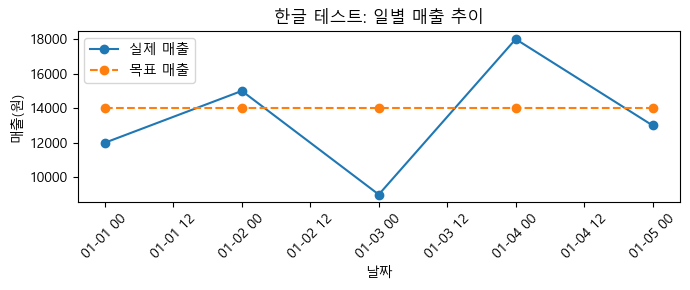

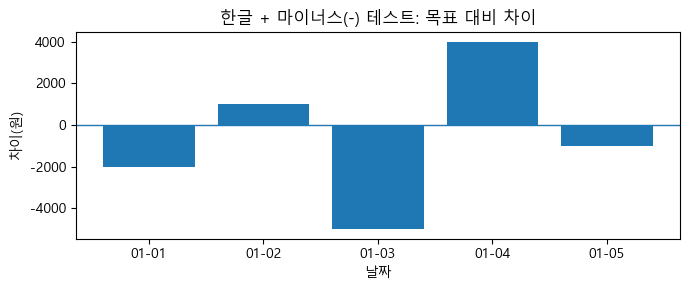

In [27]:
## 아래는 한글 폰트 설정 + 실제 차트(제목/축/범례/마이너스 포함) 테스트까지 한 번에 확인하는 코드입니다.

## 주피터 노트북에서 첫 셀에 그대로 실행하면 됩니다. (윈도우 기준)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# =========================
# 1) 한글 폰트 설정(윈도우 추천)
# =========================

#candidates = ["Malgun Gothic", "맑은 고딕", "NanumGothic", "굴림", "Gulim"]
#installed = {f.name for f in fm.fontManager.ttflist}

#for font in candidates:
#    if font in installed:
#        plt.rcParams["font.family"] = font
#        break

#plt.rcParams["axes.unicode_minus"] = False  # 마이너스(-) 깨짐 방지

#print("선택된 폰트:", plt.rcParams["font.family"])

# =========================
# 2) 테스트용 데이터 만들기
# =========================
df_test = pd.DataFrame({
    "날짜": pd.date_range("2026-01-01", periods=5),
    "매출": [12000, 15000, 9000, 18000, 13000],
    "목표": [14000, 14000, 14000, 14000, 14000]
})
df_test["차이(매출-목표)"] = df_test["매출"] - df_test["목표"]  # 음수 포함 테스트

# =========================
# 3) 한글 표시 실제 차트 테스트
# =========================
plt.figure(figsize=(7,3))

plt.plot(df_test["날짜"], df_test["매출"], marker="o", label="실제 매출")
plt.plot(df_test["날짜"], df_test["목표"], marker="o", linestyle="--", label="목표 매출")

plt.title("한글 테스트: 일별 매출 추이")
plt.xlabel("날짜")
plt.ylabel("매출(원)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# =========================
# 4) 마이너스(음수) 표시 테스트
# =========================
plt.figure(figsize=(7,3))
plt.bar(df_test["날짜"].dt.strftime("%m-%d"), df_test["차이(매출-목표)"])
plt.title("한글 + 마이너스(-) 테스트: 목표 대비 차이")
plt.xlabel("날짜")
plt.ylabel("차이(원)")
plt.axhline(0, linewidth=1)
plt.tight_layout()
plt.show()